In [47]:
import pandas as pd
import time 
import json
from collections import Counter
import matplotlib.pyplot as plt
# for Mac
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [46]:
with open('abs_dict_pubag.json', 'r') as read_file:
    abstract_dict = json.load(read_file)

start_len = len(abstract_dict['id'])
keywords = "convolutional+neural+networks+wheat"
#put convolutional neural network. CNN stands for Cheyenne or aminés (chemistry) etc
response = requests.get("https://api.nal.usda.gov/pubag/rest/search/?query={}&per_page=100&api_key={}".format(keywords, API_KEY)).json()
totalpages = response["request"]["totalPages"]

for i in range (totalpages):
    response = requests.get("https://api.nal.usda.gov/pubag/rest/search/?query={}&page={}&per_page=100&api_key={}".format(keywords, i+1, API_KEY)).json()
    for j in range (len(response['resultList'])):
        abs_id = response['resultList'][j]['id']
        if abs_id not in abstract_dict['id']:
            try:
                abstract_dict['id'].append(abs_id)
                abstract_dict['titles'].append(response['resultList'][j]['title'])
                abstract_dict['abstracts'].append(response['resultList'][j]['abstract'])
                abstract_dict['authors'].append((response['resultList'][j]['author']))
                abstract_dict['keywords'].append((keywords))
                abstract_dict['subject'].append((response['resultList'][j]['subject']))
                abstract_dict['date'].append((response['resultList'][j]['date']))
                abstract_dict['sources'].append((response['resultList'][j]['journal']))
            except:
                print(abs_id, " didn't work")
end_len = len(abstract_dict['id'])

print("added {} abstracts".format(end_len-start_len))


with open('pubag_abs_dict.json', 'w+') as f:
    json.dump(abstract_dict, f) response = requests.get("https://api.nal.usda.gov/pubag/rest/search/?query=precision+agriculture&per_page=100&page=22&api_key={}".format(API_KEY)).json()

added 950 abstracts


In [6]:
with open('abs_dict_pubag.json', 'r') as read_file:
    abstract_dict = json.load(read_file)

abstract_df = pd.DataFrame.from_dict(abstract_dict)
abstract_df.head()

,titles,abstracts,authors,keywords,sources,dates
0,Examining the social and biophysical determina...,Precision agricultural technologies (PA) such ...,"[Gardezi, Maaz, Bronson, Kelly]","[corn, farmers, financial economics, food prod...",Precision agriculture,2020
1,Wireless Sensor Network Synchronization for Pr...,The advent of Internet of Things has propelled...,"[Zervopoulos, Alexandros, Tsipis, Athanasios, ...","[Olea europaea, decision making, environmental...",Agriculture (Basel),2020
2,Smartphone Applications Targeting Precision Ag...,Traditionally farmers have used their perceptu...,"[Mendes, Jorge, Pinho, Tatiana M., Neves dos ...","[cost effectiveness, crops, farmers, humans, m...",Agronomy,2020
3,Controlled release micronutrient fertilizers f...,The rapid growth of the global population and ...,"[Mikula, Katarzyna, Izydorczyk, Grzegorz, Skrz...","[coatings, farmers, food safety, groundwater, ...",The Science of the total environment,2020
4,Farm adoption of embodied knowledge and inform...,On-farm adoption of individual and groups of p...,"[Miller, N. J., Griffin, T. W., Ciampitti, I. ...","[farms, precision agriculture, probability, Ka...",Precision agriculture,2019


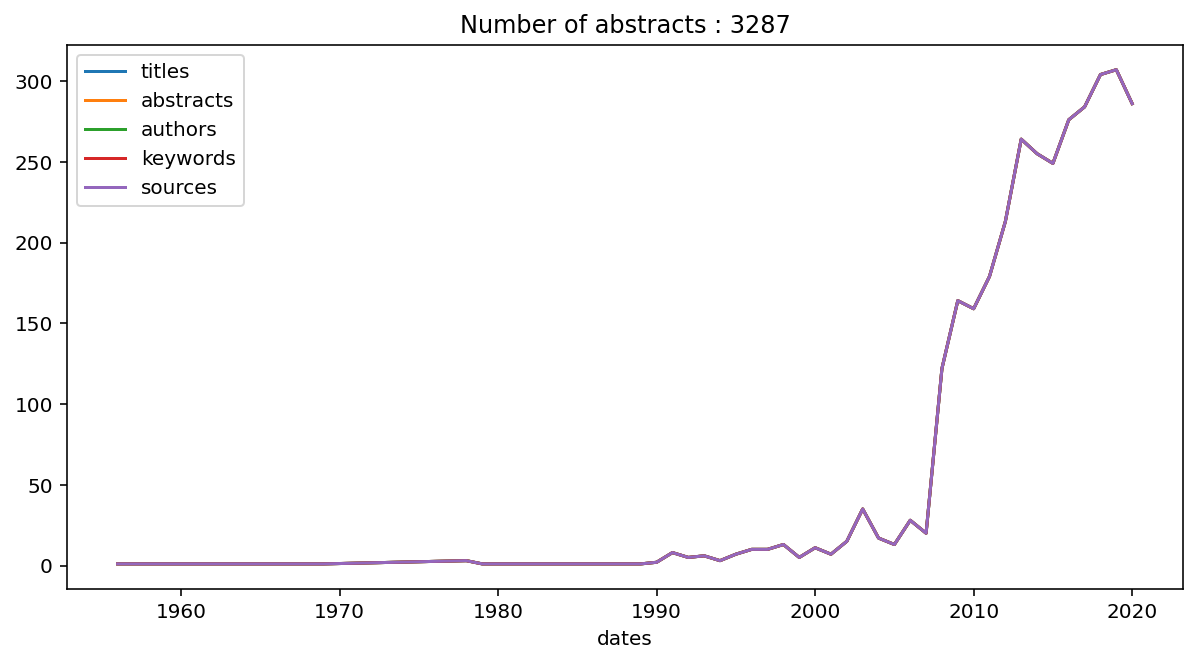

In [60]:
keyword = "milk"
max_date = 2020
inter_df = abstract_df[abstract_df['abstracts'].str.contains(keyword)]
inter_df = inter_df.astype({'dates': 'int32'})
inter_df = inter_df[(inter_df.dates > 1950) & (inter_df.dates <= max_date)]
inter_df.head()

fig, ax = plt.subplots(1, 1,figsize=(10,5))
inter_df.groupby('dates').count().plot(ax=ax)
ax.legend()
plt.title("Number of abstracts : {}".format(inter_df.shape[0]))
plt.show()